In [1]:
import numpy as np
import os
np.random.seed(42)

In [2]:

# Create arrays with filenames and lables
inFile = open("C:/Users/Lukas/Desktop/commaai-speed-challenge/data/train-grouped-optical-flow.txt", "r")

all_images = []
all_labels = []
for i, v in enumerate(inFile):
    all_images.append(str(i)+".jpg")
    all_labels.append(float(v))

len(all_images)


20398

In [3]:
train_images, val_images, test_images = all_images[: 14280], all_images[14280 : 18360], all_images[18360 :]
train_labels, val_labels, test_labels = all_labels[: 14280], all_labels[14280 : 18360], all_labels[18360 :]

In [4]:
import random

rand_train = list(zip(train_images, train_labels))
random.shuffle(rand_train)
train_images, train_labels = zip(*rand_train)

rand_val = list(zip(val_images, val_labels))
random.shuffle(rand_val)
val_images, val_labels = zip(*rand_val)

test_rand = list(zip(test_images, test_labels))
random.shuffle(test_rand)
test_images, test_labels = zip(*test_rand)

In [5]:
train_images = np.array(train_images)
train_labels = np.array(train_labels)

val_images = np.array(val_images)
val_labels = np.array(val_labels)

test_images = np.array(test_images)
test_labels = np.array(test_labels)

In [6]:
import glob
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array, array_to_img
%matplotlib inline

In [7]:

IMG_DIM = (150, 150)

train_images_array = [img_to_array(load_img("C:/Users/Lukas/Desktop/commaai-speed-challenge/data/frames/train-optical-flow/"+img, target_size=IMG_DIM)) for img in train_images]
train_images_array = np.array(train_images_array)

val_images_array = [img_to_array(load_img("C:/Users/Lukas/Desktop/commaai-speed-challenge/data/frames/train-optical-flow/"+img, target_size=IMG_DIM)) for img in val_images]
val_images_array = np.array(val_images_array)

test_images_array = [img_to_array(load_img("C:/Users/Lukas/Desktop/commaai-speed-challenge/data/frames/train-optical-flow/"+img, target_size=IMG_DIM)) for img in test_images]
test_images_array = np.array(test_images_array)

print('Train dataset shape:', train_images_array.shape, '\tValidation dataset shape:', val_images_array.shape, '\tTest dataset shape:', test_images_array.shape)


Train dataset shape: (14280, 150, 150, 3) 	Validation dataset shape: (4080, 150, 150, 3) 	Test dataset shape: (2038, 150, 150, 3)


In [8]:
# encode text category labels
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(train_labels)
train_labels_enc = le.transform(train_labels)
val_labels_enc = le.transform(val_labels)
test_labels_enc = le.transform(test_labels)

val_labels_enc

array([0, 0, 3, ..., 0, 2, 0], dtype=int64)

(150, 150, 3)


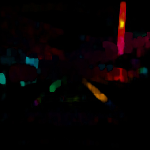

In [9]:
train_imgs_scaled = train_images_array.astype('float32')
val_imgs_scaled  = val_images_array.astype('float32')
test_imgs_scaled  = test_images_array.astype('float32')
train_imgs_scaled /= 255
val_imgs_scaled /= 255
test_imgs_scaled /= 255

print(train_images_array[0].shape)
array_to_img(train_images_array[0])

In [10]:
from keras.applications import vgg16
from keras.models import Model
import keras
import pandas as pd

In [11]:
batch_size = 24
num_classes = 7
epochs = 20
input_shape = (150, 150, 3)

In [12]:
vgg = vgg16.VGG16(include_top=False, weights='imagenet', 
                                     input_shape=input_shape)

In [13]:
output = vgg.layers[-1].output
output = keras.layers.Flatten()(output)
vgg_model = Model(vgg.input, output)


In [14]:
vgg_model.trainable = False
for layer in vgg_model.layers:
    layer.trainable = False

In [15]:
pd.set_option('max_colwidth', -1)
layers = [(layer, layer.name, layer.trainable) for layer in vgg_model.layers]
pd.DataFrame(layers, columns=['Layer Type', 'Layer Name', 'Layer Trainable'])    

,Layer Type,Layer Name,Layer Trainable
0,<tensorflow.python.keras.engine.input_layer.InputLayer object at 0x000001C7E71D3070>,input_1,False
1,<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x000001CB1F9A3D00>,block1_conv1,False
2,<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x000001CB1F9B58B0>,block1_conv2,False
3,<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x000001CB1F9B5580>,block1_pool,False
4,<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x000001CB1FA8FE20>,block2_conv1,False
5,<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x000001CB1FA97250>,block2_conv2,False
6,<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x000001CB1FA8A790>,block2_pool,False
7,<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x000001CB1FAA3370>,block3_conv1,False
8,<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x000001CB1FAA3AC0>,block3_conv2,False
9,<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x000001CB1FAA1F40>,block3_conv3,False


(1, 4, 4, 512)


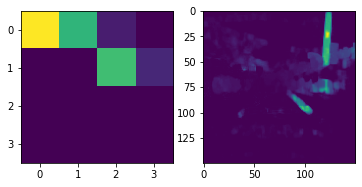

In [16]:
bottleneck_feature_example = vgg.predict(train_imgs_scaled[0:1])
print(bottleneck_feature_example.shape)

plt.subplot(1, 2, 1)
plt.imshow(bottleneck_feature_example[0][:,:,0])
plt.subplot(1, 2, 2)
plt.imshow(train_imgs_scaled[0][:,:,0])

In [17]:
def get_bottleneck_features(model, input_imgs):
    features = model.predict(input_imgs, verbose=1)
    return features
    
train_features_vgg = get_bottleneck_features(vgg_model, train_imgs_scaled)
val_features_vgg = get_bottleneck_features(vgg_model, val_imgs_scaled)

print('Train Bottleneck Features:', train_features_vgg.shape, 
      '\tValidation Bottleneck Features:', val_features_vgg.shape)

128/128 [==============================] - 481s 4s/step
Train Bottleneck Features: (14280, 8192) 	Validation Bottleneck Features: (4080, 8192)


In [18]:
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, InputLayer
from keras.models import Sequential
from keras import optimizers

In [19]:
input_shape = vgg_model.output_shape[1]
input_shape

8192

In [20]:
model = Sequential()
model.add(InputLayer(input_shape=(input_shape,)))
model.add(Dense(512, activation='relu', input_dim=input_shape))
model.add(Dropout(0.3))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(num_classes, activation='sigmoid'))


In [21]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['accuracy'])

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               4194816   
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 7)                 3591      
Total params: 4,461,063
Trainable params: 4,461,063
Non-trainable params: 0
_________________________________________________________________


In [23]:
history = model.fit(x=train_features_vgg, y=train_labels_enc,
                    validation_data=(val_features_vgg, val_labels_enc),
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1)

Epoch 1/20
595/595 [==============================] - 43s 70ms/step - loss: 1.4263 - accuracy: 0.4713 - val_loss: 2.5642 - val_accuracy: 0.1721
Epoch 2/20
595/595 [==============================] - 41s 68ms/step - loss: 0.9054 - accuracy: 0.6604 - val_loss: 2.8292 - val_accuracy: 0.1578
Epoch 3/20
595/595 [==============================] - 39s 66ms/step - loss: 0.7101 - accuracy: 0.7256 - val_loss: 3.4563 - val_accuracy: 0.1282
Epoch 4/20
595/595 [==============================] - 40s 67ms/step - loss: 0.6008 - accuracy: 0.7622 - val_loss: 3.5359 - val_accuracy: 0.1551
Epoch 5/20
595/595 [==============================] - 40s 67ms/step - loss: 0.5436 - accuracy: 0.7891 - val_loss: 3.9981 - val_accuracy: 0.1924
Epoch 6/20
595/595 [==============================] - 41s 69ms/step - loss: 0.4638 - accuracy: 0.8177 - val_loss: 3.7369 - val_accuracy: 0.2047
Epoch 7/20
595/595 [==============================] - 40s 67ms/step - loss: 0.4282 - accuracy: 0.8371 - val_loss: 5.2149 - val_accuracy:

In [24]:
model.save('model_classify_frames.h5')

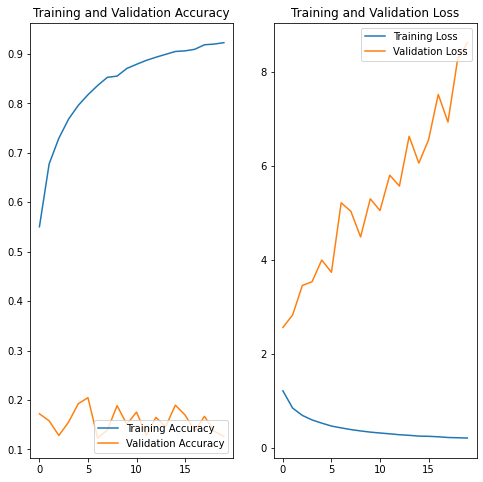

In [25]:
#plot results
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [26]:
test_bottleneck_features = get_bottleneck_features(vgg_model, test_imgs_scaled)


64/64 [==============================] - 232s 4s/step


In [27]:
results = model.evaluate(test_bottleneck_features ,test_labels_enc, batch_size=batch_size)


85/85 [==============================] - 1s 5ms/step - loss: 5.4955 - accuracy: 0.3449
